In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## bellenguez

pT = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/PRS/36k_ibd/bellenguez_pT_36k_ibd.tsv', sep = '\t')
allele_flip = pd.read_csv('/gpfs/commons/home/tlin/output/prs/new_anno_0318_24/bellenguez_adsp_reference/allele_flip/allele_flip.prs.tsv',sep = '\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
PRS_pT = pT.loc[:,["PRS_e6","PRS_e5","PRS_e4","PRS_001","PRS_01","PRS_1","Diagnosis"]]
PRS_pT = PRS_pT.rename(columns={"PRS_001":'PRS_e3',"PRS_01":'PRS_e2',"PRS_1":"PRS_0.1"})


In [33]:
PRS_pT.corr()

,PRS_e6,PRS_e5,PRS_e4,PRS_e3,PRS_e2,PRS_0.1,Diagnosis
PRS_e6,1.000000,0.625788,0.091321,-0.008117,0.021273,-0.057969,-0.025928
PRS_e5,0.625788,1.000000,0.163884,0.040652,0.041293,-0.061396,-0.031435
PRS_e4,0.091321,0.163884,1.000000,0.365377,0.118058,0.052803,-0.009065
PRS_e3,-0.008117,0.040652,0.365377,1.000000,0.310642,0.173345,0.026074
PRS_e2,0.021273,0.041293,0.118058,0.310642,1.000000,0.351425,-0.002859
PRS_0.1,-0.057969,-0.061396,0.052803,0.173345,0.351425,1.000000,0.065516
Diagnosis,-0.025928,-0.031435,-0.009065,0.026074,-0.002859,0.065516,1.000000


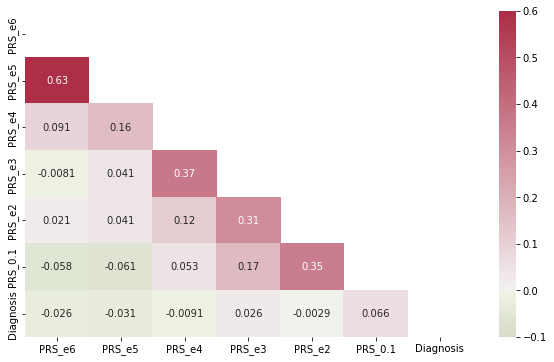

In [135]:
plt.figure(figsize=(10,6))
corr = PRS_pT.corr()
cmap = sns.diverging_palette(100, 5, s=75, l=40,
                            n=8, center="light", as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap  = cmap,robust = True,  mask = mask, annot=True, center = 0, vmin = -0.1, vmax = 0.6)
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/pT_correlation.pdf',transparent=True)
plt.show()

In [71]:
polyfun_corr = allele_flip[['PRS_susie','PRS_bl','PRS_bl_omics','PRS_bl_omics_dl','Diagnosis']].corr()
polyfun_corr

,PRS_susie,PRS_bl,PRS_bl_omics,PRS_bl_omics_dl,Diagnosis
PRS_susie,1.000000,0.226039,0.226294,0.227159,0.054436
PRS_bl,0.226039,1.000000,0.997391,0.993861,0.141494
PRS_bl_omics,0.226294,0.997391,1.000000,0.991366,0.144933
PRS_bl_omics_dl,0.227159,0.993861,0.991366,1.000000,0.138545
Diagnosis,0.054436,0.141494,0.144933,0.138545,1.000000


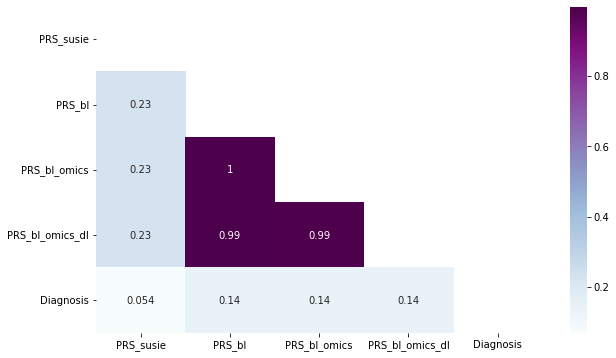

In [136]:
plt.figure(figsize=(10,6))
corr = polyfun_corr
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap  = 'BuPu',robust = True,  mask = mask, annot=True)
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/polyfun_correlation.pdf',transparent=True)
plt.show()

In [88]:
cor = PRS_pT.corr().iloc[:,6].append(polyfun_corr.iloc[:,4])
cor

PRS_e6            -0.025928
PRS_e5            -0.031435
PRS_e4            -0.009065
PRS_e3             0.026074
PRS_e2            -0.002859
PRS_0.1            0.065516
Diagnosis          1.000000
PRS_susie          0.054436
PRS_bl             0.141494
PRS_bl_omics       0.144933
PRS_bl_omics_dl    0.138545
Diagnosis          1.000000
Name: Diagnosis, dtype: float64

In [92]:
cor = cor.drop(cor.index[6])


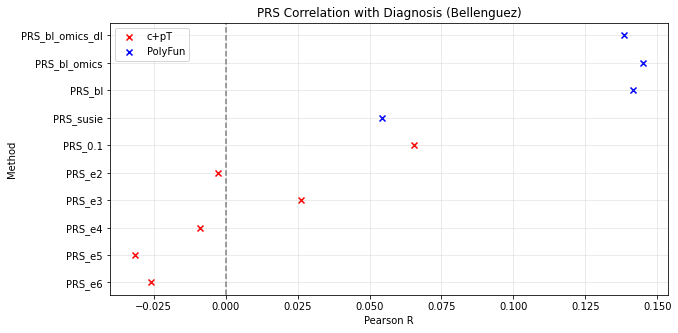

In [134]:
plt.figure(figsize=(10, 5))
plt.scatter(PRS_pT.corr().iloc[:6,6], PRS_pT.corr().iloc[:6,6].index, color='red', label='c+pT', marker = 'x')
plt.scatter(polyfun_corr.iloc[:4,4], polyfun_corr.iloc[:4,4].index, color='blue', label='PolyFun', marker = 'x')

plt.xlabel('Pearson R')
plt.ylabel('Method')
plt.title('PRS Correlation with Diagnosis (Bellenguez)')

plt.grid(True, alpha = 0.3)
plt.legend()
plt.axvline(x=0,linestyle='--', color = 'grey')
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/prs_correlation.pdf',transparent=True)
plt.show()


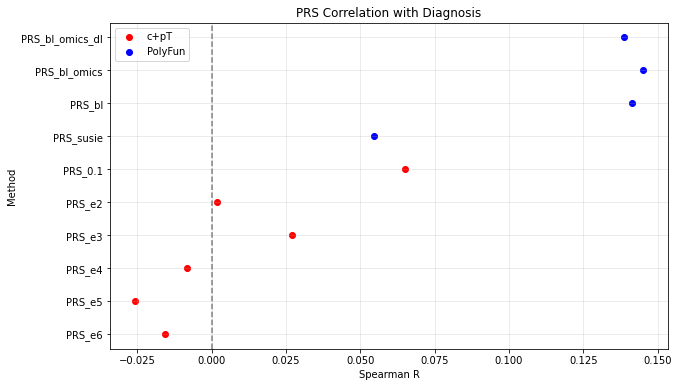

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(PRS_pT.corr(method='spearman').iloc[:6,6], PRS_pT.corr(method='spearman').iloc[:6,6].index, color='red', label='c+pT')

# Plot rest set in blue
plt.scatter(polyfun_corr.iloc[:4,4], polyfun_corr.iloc[:4,4].index, color='blue', label='PolyFun')

# Add labels and title
plt.xlabel('Spearman R')
plt.ylabel('Method')
plt.title('PRS Correlation with Diagnosis')

plt.grid(True, alpha = 0.3)
plt.legend()
plt.axvline(x=0,linestyle='--', color = 'grey')
plt.show()
